## 文本相似度

文本数据是非结构化的和高噪声的.在执行文本分类时,拥有标记合理的训练数据和有监督学习大有裨益.

但是,文档聚类是一个无监督的学习过程,我们将尝试通过让机器学习各种各样的文本文档及其特征,相似

度以及它们之间的差异,来将文档分割和分类为单独的类别.

本章将重点介绍与文本相似度,距离度量和无监督ML算法相关的几个概念,以回答以下问题:

- 如何衡量文档之间的相似度?
- 如何使用距离测量值称为度量?
- 什么时候距离测量值称为度量?
- 如何聚类或组合类似的文档?
- 可以可视化文档聚类吗?

### 相似度测量
相似度或距离测量值通常是用来衡量两个实体之间的接近程度的,其中实体可以是任何文本形式,例如文档,句子甚至是短语.

实体之间的相似程度由两个主要因素决定:
- 实体的固有属性或特征
- 测量公式及其特性

### 无监督的机器学习算法
无监督的机器学习算法属于ML算法系列,从数据的各种属性和特征中发现其中潜在的,隐藏的结构和模式.

## 文本规范化

In [170]:
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#更新停用词列表
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr','mrs','come','go','get','tell','listen','one','two','three','four',
                                'five','six','seven','eight','nine','zero','join','find','make','say','ask',
                                'tell','see','try','back','also']

In [3]:
#使用正则表达式从文本主体中提取文本标识
def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


In [4]:
def normalize_corpus(corpus, lemmatize=True,
                    only_text_chars=False,
                    tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = html_parser.unescape(text) #html分析
        text = expand_contractions(text, CONTRACTION_MAP) #扩展缩写词
        if lemmatize:
            text = lemmatize_text(text) #词形还原
        else:
            text = text.lower()
        
        # 删除停用词及特殊字符
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        
        #提取文本标识
        if only_text_chars:
            text = keep_text_characters(text)
            
        if tokenize:
            text = tokenize_text(text) #分词
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
    return normalized_corpus

## 特征提取

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1,1), min_df=0.0, max_df=1.0):
    '''
    min_df:忽略文档频率低于该阈值的特征
    max_df:忽略文档频率高于该阈值的特征
    '''
    feature_type = feature_type.lower().strip()
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
    else:
        raise Exception('Wrong feature type entered.Possible values: "binary","frequency","tfidf"')
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

## 文本相似度
文本相似度分析的主要目的是分析和测量两个文本实体彼此距离的远近.

文本相似度分析的目的大致分为以下两个方面:
- 词汇相似度:通过句法,结构和内容研究文本文档的内容,并根据这些参数测量其相似度
- 语义相似度:首先找出文档的语义,含义和上下文,然后找出它们彼此的距离.在这方面,依存语法和实体识别是很有用的工具

接下来,将主要介绍以下两个领域的文本相似度:
- 词项相似度: 在这里,将测量每个标识或单词之间的相似度
- 文档相似度: 在这里,将测量整个文本文档之间的相似度

## 词项相似度分析
从分析单独的单词标识相似度入手.我们可以使用词项相似度分析中的部分技术来纠正拼写错误的词项.进行词项相似度分析,

首先需要选择一种单词标识方法,然后指定一种距离度量.我们将使用如下单词表示方法:

- 字符向量化
- 字符袋(Bag of Character)向量化

In [6]:
import numpy as np

def vectorize_terms(terms):
    terms = [term.lower() for term in terms]
    terms = [np.array(list(term)) for term in terms]
    terms = [np.array([ord(char) for char in term]) for term in terms]
    
    return terms

In [7]:
from scipy.stats import itemfreq

def boc_term_vectors(word_list):
    word_list = [word.lower() for word in word_list]
    unique_chars = np.unique(np.hstack([list(word) for word in word_list]))
    word_list_term_counts = [{char: count for char, count in itemfreq(list(word))} for word in word_list]
    boc_vectors = [np.array([int(word_term_counts.get(char, 0)) for char in unique_chars])
                  for word_term_counts in word_list_term_counts]
    
    return list(unique_chars), boc_vectors

In [8]:
root = 'Believe'
term1 = 'beleive'
term2 = 'bargain'
terms = [root, term1, term2]
#Character vectorization
vec_root, vec_term1, vec_term2 = vectorize_terms(terms)
#show vector representations
print '''
root:{}
term1:{}
term2:{}
'''.format(vec_root, vec_term1, vec_term2)


root:[ 98 101 108 105 101 118 101]
term1:[ 98 101 108 101 105 118 101]
term2:[ 98  97 114 103  97 105 110]



In [9]:
# bag of characters vectorization
features,(boc_root, boc_term1, boc_term2) = boc_term_vectors(terms)
#show features and vector representations
print 'Features:', features
print '''
root:{}
term1:{}
term2:{}
'''.format(boc_root, boc_term1, boc_term2)

Features: ['a', 'b', 'e', 'g', 'i', 'l', 'n', 'r', 'v']

root:[0 1 3 0 1 1 0 0 1]
term1:[0 1 3 0 1 1 0 0 1]
term2:[2 1 0 1 1 0 1 1 0]



本节将介绍以下五个度量:
- 汉明距离(Hamming distance)
- 曼哈顿距离(Manhattan distance)
- 欧几里得距离(Euclidean distance)
- 莱文斯坦编辑距离(Levenshtein edit distance)
- 余弦距离(Cosine distance)和相似度

首先,设置一些必要的变量以存储根词项,其他词项以及它们的向量化表示.

In [10]:
root_term = root
root_vector = vec_root
root_boc_vector = boc_root

term1 = [term1, term2]
vector_terms = [vec_term1, vec_term2]
boc_vector_terms = [boc_term1, boc_term2]

### 汉明距离
汉明距离是两个长度相等的字符串之间的测量距离.它的正式定义是两个长度相等的字符串之间互异字符或符号的位置的数量.

In [11]:
def hamming_distance(u,v,norm=False):
    if u.shape!=v.shape:
        raise ValueError('The vectors must have equal lengths.')
        
    return (u!=v).sum() if not norm else (u!=v).mean()

In [12]:
#compute Hamming distance
for term,vector_term in zip(terms, vector_terms):
    print 'Hamming distance between root: {} and term: {} is {}'.format(root_term, term, 
                                                                        hamming_distance(root_vector,vector_term,norm=False))
    

Hamming distance between root: Believe and term: Believe is 2
Hamming distance between root: Believe and term: beleive is 6


In [13]:
#compute normalized Hamming distance
for term, vector_term in zip(terms, vector_terms):
    print 'Normalized Hamming distance between root: {} and term:{} is {}'.format(root_term, term,
                                                                           np.round(hamming_distance(root_vector,vector_term,norm=True),2))

Normalized Hamming distance between root: Believe and term:Believe is 0.29
Normalized Hamming distance between root: Believe and term:beleive is 0.86


### 曼哈顿距离
曼哈顿距离计算两个字符串的每个位置熵对应字符之间的差值,而不是计算不匹配字符的数量.**曼哈顿距离也称为城市街区距离,L1范数,计程车度量**.

正式定义是基于严格水平或垂直路径的网格中两个点之间的距离,而非通常计算的欧几里得对角距离.

**两个字符串的长度必须一样**

In [14]:
def manhattan_distance(u,v,norm=False):
    if len(u) != len(v):
        raise ValueError('The vectors must have equal lengths.')
    return abs(u-v).sum() if not norm else abs(u-v).mean()

In [15]:
#compute manhattan distance
for term, vector_term in zip(terms, vector_terms):
    print 'Manhattan distance between root: {} and term: {} is {}'.format(root_term, term,
                                                                          manhattan_distance(root_vector,vector_term, norm=False))

Manhattan distance between root: Believe and term: Believe is 8
Manhattan distance between root: Believe and term: beleive is 38


In [16]:
#compute normalized Manhattan distance
for term, vector_term in zip(terms, vector_terms):
    print 'Normalized Manhattan distance between root: {} and term:{} is {}'.format(root_term, term,
                                                                                   round(manhattan_distance(root_vector,vector_term,norm=True),2))

Normalized Manhattan distance between root: Believe and term:Believe is 1.14
Normalized Manhattan distance between root: Believe and term:beleive is 5.43


### 欧几里得距离
欧几里得距离也称为欧几里得范数,L2范数或L2距离.正式定义是两点之间最短的直线距离.

In [17]:
def euclidean_distance(u,v):
    if len(u) != len(v):
        raise ValueError('The vectors must have equal lengths.')
    distance = np.sqrt(np.sum(np.square(u-v)))
    return distance

In [18]:
#compute Euclidean distance
for term, vector_term in zip(terms, vector_terms):
    print 'Euclidean distance between root: {} and term: {} is {}'.format(
        root_term,
        term,
        round(euclidean_distance(root_vector, vector_term),2)
    )

Euclidean distance between root: Believe and term: Believe is 5.66
Euclidean distance between root: Believe and term: beleive is 17.94


### 莱文斯坦编辑距离
莱文斯坦编辑距离通常也称为莱文斯坦距离,属于基于编辑距离的度量.两个词项之间的莱文斯坦编辑距离可以定义为通过添加,

删除或替换一个词项转变成另一个词项所需的最少编辑次数.

对于莱文斯坦编辑距离的几个有趣额边界条件:
- 两个词项之间编辑距离的最小值是两个词项长度的差值
- 两个词项之间编辑距离的最大值是两个词项的最长长度
- 如果两个词项完全一样,它们的莱文斯坦编辑距离为0
- 当且仅当两个词项拥有相同长度的时候,莱文斯坦编辑距离的上限等于汉明距离
- 莱文斯坦编辑距离作为距离度量也满足三角不等式特性.

在计算莱文斯坦编辑距离的时候,我们通过创建对两个词项构建成一个矩阵,然后使用动态规划来进行计算.

这种算法也称为瓦格纳-费舍尔算法.关于此算法相关的信息,更多请参考"字符串到字符串校正问题"一文.

In [58]:
import copy
import pandas as pd

def levenshtein_edit_distance(u,v):
    #convert to lower case
    u = u.lower()
    v = v.lower()
    
    #base cases
    try:
        if u==v: 
            return 0,None
        elif len(u) == 0: 
            return len(v),None
        elif len(v) == 0: 
            return len(u),None
    except e:
        print e
    
    #initialize edit distance matrix
    edit_matrix = []
    
    # initialize two distance matrics
    du = [0]*(len(v)+1)
    dv = [0]*(len(u)+1)
    
    #du: the previous row of edit distances
    for i in range(len(du)):
        du[i] = i
    
    #dv: the current row of edit distances
    for i in range(len(u)):
        dv[0] = i+1
        #compute cost ad per algorithm
        for j in range(len(v)):
            cost = 0 if u[i] == v[j] else 1
            dv[j+1] = min(dv[j]+1, du[j+1]+1, du[j]+cost) #删除,添加,替换,三种操作中编辑距离最小的
        #assign dv to du for next iteration
        for j in range(len(du)):
            du[j] = dv[j]
        #copy dv to the edit matrix
        edit_matrix.append(copy.copy(dv))
    
    #compute the final edit distance and edit matrix
    distance = dv[len(v)]
    edit_matrix = np.array(edit_matrix)
    edit_matrix = edit_matrix.T
    edit_matrix = edit_matrix[1:,]
    edit_matrix = pd.DataFrame(data=edit_matrix,
                              index=list(v),
                              columns=list(u))
    return distance, edit_matrix

In [59]:
for term in terms:
    edit_d,edit_m = levenshtein_edit_distance(root_term, term)
    print 'Computing distance between root: {} and term: {}'.format(root_term, term)
    
    print('Levenshtein edit disntance is {}'.format(edit_d))
    print('The complete edit distance matrix is depicted below')
    print edit_m
    print '-'*30

Computing distance between root: Believe and term: Believe
Levenshtein edit disntance is 0
The complete edit distance matrix is depicted below
None
------------------------------
Computing distance between root: Believe and term: beleive
Levenshtein edit disntance is 2
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
e  1  0  1  2  3  4  5
l  2  1  0  1  2  3  4
e  3  2  1  1  1  2  3
i  4  3  2  1  2  2  3
v  5  4  3  2  2  2  3
e  6  5  4  3  2  3  2
------------------------------
Computing distance between root: Believe and term: bargain
Levenshtein edit disntance is 6
The complete edit distance matrix is depicted below
   b  e  l  i  e  v  e
b  0  1  2  3  4  5  6
a  1  1  2  3  4  5  6
r  2  2  2  3  4  5  6
g  3  3  3  3  4  5  6
a  4  4  4  4  4  5  6
i  5  5  5  4  5  5  6
n  6  6  6  5  5  6  6
------------------------------


### 余弦距离和相似度
余弦距离是一个可以从余弦相似度推导得出的度量,反之亦然.

In [60]:
def cosine_distance(u,v):
    distance = 1.0 - (np.dot(u,v)/(np.sqrt(sum(np.square(u))) * np.sqrt(sum(np.square(v)))))
    return distance

In [61]:
for term,boc_term in zip(terms, boc_vector_terms):
    print 'Analyzing similarity between root: {} and term: {}'.format(root_term,term)
    distance=round(cosine_distance(root_boc_vector, boc_term),2)
    similarity = 1-distance
    print('Cosine distance is {}'.format(distance))
    print('Cosine similarity is {}'.format(similarity))
    print '-'*40

Analyzing similarity between root: Believe and term: Believe
Cosine distance is -0.0
Cosine similarity is 1.0
----------------------------------------
Analyzing similarity between root: Believe and term: beleive
Cosine distance is 0.82
Cosine similarity is 0.18
----------------------------------------


我们可以通过配合WordNet语义字典组合使用,即可以在用户键入拼写错误的单词时,通过测量单词之间的相似度来提供语义上和语法熵正确的单词,

从而提供正确的拼写建议.

## 文档相似度分析
本节将介绍以下度量:
- 余弦相似度
- 海灵格-巴塔恰亚距离
- Okapi BM25排名

In [69]:
from normalization import normalize_corpus
from utils import build_feature_matrix
import numpy as np

#load the toy corpus index
toy_corpus = ['The sky is blue',
'The sky is blue and beautiful',
'Look at the bright blue sky!',
'Python is a great Programming language',
'Python and Java are popular Programming languages',
'Among Programming languages, both Python and Java are the most used in Analytics',
'The fox is quicker than the lazy dog',
'The dog is smarter than the fox',
'The dog, fox and cat are good friends']

#load the docs for which we will be measuring similarities
query_docs = ['The fox is definitely smarter than the dog',
            'Java is a static typed programming language unlike Python',
              'I love to relax under the beautiful blue sky!']

In [70]:
norm_corpus = normalize_corpus(toy_corpus, lemmatize=True)
tfidf_vectorizer, tfidf_features = build_feature_matrix(norm_corpus,
                                                       feature_type='tfidf',
                                                       ngram_range=(1,1),
                                                       min_df=0.0,
                                                       max_df=1.0)
#normalize and extract features from the query corpus
norm_query_docs = normalize_corpus(query_docs, lemmatize=True)
query_docs_tfidf = tfidf_vectorizer.transform(norm_query_docs)

### 余弦相似度
使用前面的词项余弦相似度来计算文档的余弦相似度得分,采用基于词袋模型的文档向量,并用TF-IDF数值代替词频.

In [73]:
def compute_cosine_similarity(doc_features, corpus_features, top_n=3):
    #get document vectors
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    #compute similarities
    similarity = np.dot(doc_features, corpus_features.T)
    
    #get docs with hightest similarity scores
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_scores = [(index, round(similarity[index], 3)) for index in top_docs]
    
    return top_docs_with_scores

In [74]:
#get Cosine similarity results for out example documents
print 'Document Similarity Analysis using Cosine Similarity'
print '-'*40
for index,doc in enumerate(query_docs):
    doc_tfidf = query_docs_tfidf[index]
    top_similar_docs = compute_cosine_similarity(doc_tfidf, tfidf_features, top_n=2)
    print('Document',index+1,':',doc)
    print('Top',len(top_similar_docs), 'similar docs:')
    print('-'*40)
    for doc_index, sim_score in top_similar_docs:
        print('Doc num: {} Similarity Score: {}\n Doc: {}'.format(doc_index+1, sim_score, toy_corpus[doc_index]))
        print('-'*40)
    print

Document Similarity Analysis using Cosine Similarity
----------------------------------------
('Document', 1, ':', 'The fox is definitely smarter than the dog')
('Top', 2, 'similar docs:')
----------------------------------------
Doc num: 8 Similarity Score: 1.0
 Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7 Similarity Score: 0.426
 Doc: The fox is quicker than the lazy dog
----------------------------------------

('Document', 2, ':', 'Java is a static typed programming language unlike Python')
('Top', 2, 'similar docs:')
----------------------------------------
Doc num: 5 Similarity Score: 0.837
 Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 6 Similarity Score: 0.661
 Doc: Among Programming languages, both Python and Java are the most used in Analytics
----------------------------------------

('Document', 3, ':', 'I love to relax under the beautiful blue sky!')
('Top', 2, 'similar d

### 海灵格-巴塔恰亚距离
海灵格-巴塔恰亚距离(HB距离)也称为海灵格距离或巴塔恰亚距离.用于测量两个离散或连续概率之间的相似度.它是一个f散度,

f散度在概率论中定义为函数$D_f(P||Q)$,用于测量两个函数P和Q概率分布之间的差异.

In [150]:
def compute_hellinger_bhattacharya_distance(doc_features, corpus_features, top_n=3):
    #get document vectors
    doc_featuers = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()

    #compute hb distances
    distance = np.hstack(np.sqrt(0.5*np.sum(np.square(np.sqrt(doc_features)-np.sqrt(corpus_features)),axis=1))).A1

    #get docs with lowest distance scores,index
    print top_n
    top_docs = distance.argsort()[:top_n]
    top_docs_with_score = [(index, round(distance[index],3)) for index in top_docs]
    return top_docs_with_score

In [151]:
#get Hellinger-Bhattacharya distance based similarities for out example documents
print('Document Similarity Analysis using Hellinger-Bhattacharya')
print '-'*40
for index, doc in enumerate(query_docs):
    doc_tfidf = query_docs_tfidf[index]
    top_similar_docs = compute_hellinger_bhattacharya_distance(doc_tfidf, tfidf_features, top_n=2)
    print 'Document', index+1,':',doc
    print 'Top', len(top_similar_docs), 'similar docs:'
    print '-'*40
    for doc_index, sim_score in top_similar_docs:
        print('Doc num: {} Distance Score: {}\nDoc:{}'.format(doc_index+1, sim_score, toy_corpus[doc_index]))
        print '-'*40
    print

Document Similarity Analysis using Hellinger-Bhattacharya
----------------------------------------
2
Document 1 : The fox is definitely smarter than the dog
Top 2 similar docs:
----------------------------------------
Doc num: 8 Distance Score: 0.0
Doc:The dog is smarter than the fox
----------------------------------------
Doc num: 7 Distance Score: 0.96
Doc:The fox is quicker than the lazy dog
----------------------------------------

2
Document 2 : Java is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 5 Distance Score: 0.53
Doc:Python and Java are popular Programming languages
----------------------------------------
Doc num: 4 Distance Score: 0.766
Doc:Python is a great Programming language
----------------------------------------

2
Document 3 : I love to relax under the beautiful blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 Distance Score: 0.0
Doc:The sky is blue and bea

从上面的输出可以看出,具有较低HB距离得分的文档与查询文档更为相似,输出文档结果与使用余弦相似度获得的输出文档非常相似.

**在构建大型的相似度分析系统时,推荐使用在gensim.matutils模块**

### Okapi BM25 排名
Okapi BM25 的正式定义是采用一个基于词袋模型,根据用户输入检索相关文档的文档排名和检索函数.

我们通过以下几个步骤来计算文档的BM25得分:
- 建立一个函数以获得语料库中词项的逆文档频率值
- 构建一个计算查询文档和语料库文档的BM25得分的函数
- 为语料库文档和查询文档获取基于词袋的特征
- 使用第一步中的函数计算语料库文档的平均长度和语料库文档中词项的IDF值
- 使用第2步中的函数计算BM25得分,为相关文档排序并为每个查询文档获取前n个最相关的文档

In [152]:
import scipy.sparse as sp

def compute_corpus_term_idfs(corpus_features, norm_corpus):
    dfs = np.diff(sp.csc_matrix(corpus_features, copy=True).indptr)
    dfs = 1+dfs # to smoothen idf later
    total_docs = 1 + len(norm_corpus)
    idfs = 1.0+np.log(float(total_docs) / dfs)
    return idfs

实现基于查询文件的,对语料库中所有文档的BM25得分进行计算的主要函数.

In [155]:
def compute_bm25_similarity(doc_features, corpus_features, corpus_doc_lengths, avg_doc_length,
                           term_idfs, k1=1.5, b=0.75, top_n=3):
    '''
    首先计算分子,然后计算分母,最后,将分子除以分母,获得所有语料库文档的BM25得分.
    
    最后按降序排列,并返回前n个具有最高BM25得分的相关文档.
    '''
    #get corpus bag of words features
    corpus_features = corpus_features.toarray()
    #convert query document features to binary features
    #this is to keep a note of which terms exist per document
    doc_features = doc_features.toarray()[0]
    doc_features[doc_features>=1] = 1
    
    #compute the document idf scores for present terms
    doc_idfs = doc_features * term_idfs
    #compute numerator expression in BM25 equation
    numerator_coeff = corpus_features * (k1+1)
    numerator = np.multiply(doc_idfs, numerator_coeff)
    #compute denominator expression in BM25 equation
    denominator_coeff = k1*(1-b+(b*(corpus_doc_lengths/avg_doc_length)))
    denominator_coeff = np.vstack(denominator_coeff)
    
    denominator = corpus_features + denominator_coeff
    
    #compute the BM25 score combining the above equations
    bm25_scores = np.sum(np.divide(numerator, denominator), axis=1)
    
    #get top n relevant docs with highest BM25 score
    top_docs = bm25_scores.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(bm25_scores[index], 3)) for index in top_docs]
    
    return top_docs_with_score
    

In [156]:
#build bag of words based features first
vectorizer, corpus_features  = build_feature_matrix(norm_corpus, feature_type='frequency')

query_docs_features = vectorizer.transform(norm_query_docs)

#get average document length of the corpus(avgdl)
doc_lengths = [len(doc.split()) for doc in norm_corpus]
avg_dl = np.average(doc_lengths)

#Get the corpus term idfs
corpus_term_idfs = compute_corpus_term_idfs(corpus_features, norm_corpus)

#analyze document similarity using BM25 framework
print 'Document Similarity Analysis sing BM25'
print '-'*60
for index, doc in enumerate(query_docs):
    doc_features = query_docs_features[index]
    top_similar_docs = compute_bm25_similarity(doc_features,
                                              corpus_features,
                                              doc_lengths,
                                              avg_dl,
                                              corpus_term_idfs,
                                              k1=1.5,
                                              b=0.75,
                                              top_n=2)
    print 'Document', index+1, ':', doc
    print 'Top', len(top_similar_docs), 'similar docs:'
    print '-'*40
    for doc_index, sim_score in top_similar_docs:
        print 'Doc num: {} BM25 Score: {} \n Doc: {}'.format(doc_index+1, sim_score, toy_corpus[doc_index])
        print '-'*40
    print

Document Similarity Analysis sing BM25
------------------------------------------------------------
Document 1 : The fox is definitely smarter than the dog
Top 2 similar docs:
----------------------------------------
Doc num: 8 BM25 Score: 7.334 
 Doc: The dog is smarter than the fox
----------------------------------------
Doc num: 7 BM25 Score: 3.88 
 Doc: The fox is quicker than the lazy dog
----------------------------------------

Document 2 : Java is a static typed programming language unlike Python
Top 2 similar docs:
----------------------------------------
Doc num: 5 BM25 Score: 7.248 
 Doc: Python and Java are popular Programming languages
----------------------------------------
Doc num: 6 BM25 Score: 6.042 
 Doc: Among Programming languages, both Python and Java are the most used in Analytics
----------------------------------------

Document 3 : I love to relax under the beautiful blue sky!
Top 2 similar docs:
----------------------------------------
Doc num: 2 BM25 Score:

从上面的输出可以看出,BM25得分越高,文档越相关.该模块算法的核心仍然是基于前述过程的,所以应该能够取得不错的效果.

**注意:**

事实上,诸如solr或ES这样的信息搜索框架是建立在Lucene之上的,Lucene使用这类的排名算法从存储文档的索引中返回相关的文档,

你也可以使用排名算法构建自己的搜索引擎.更多信息请查阅:www.elastic.co/blog/found-bm-vs-lucene-default-similarity

该文章展示了BM25的表现远远由于Lucene默认的相似度排名方法.

## 文档聚类
文档聚类或聚类分析是NLP和文本分析中的一个有趣的领域,它应用了无监督的ML概念和技术.

几种流行的聚类算法简要描述如下:
- 层次聚类模型: 这些聚类模型也称为**基于连接的聚类方法**.
    它基于一个概念,即相似对象在向量空间中应更接近于相关对象,而不是无关对象,即它们距离无关对象更远.
    聚类通过基于距离的连接对象形成,可以**采用树形图来可视化**.
    这些模型的输出是完整的,层次结构详尽的聚类.该类模型主要分为凝聚式和分裂式聚类模型.
    
- 基于质心的聚类模型:这些模型以这样的方式构建聚类,即每个聚类都有一个中心的,有代表性的成员,
    它能够代表整个聚类,并具有将特定聚类和其他聚类区分开来的特征.
    基于质心的聚类模型包含多种算法,如k-means,k-medoids算法等,此类算法中我们需要提前设置聚类k的数量,
    并且最小化距离度量(如每个数据点到质心的距离的平方).这些模型的缺点是你需要提前指定k值,而这可能会导致局部极小值,
    使你无法获得数据的真实聚类表示.
    
- 基于分布的聚类模型:这类模型利用概率分布的概念来聚类数据点.它的理念是具有相似分布的对象可以聚类成相同的组或聚类.
    高斯混合模型使用诸如EM算法来构建这些聚类.特征,属性相关性和依存关系也可以使用这些模型来捕获,但是这类模型容易过拟合.
    
- 基于密度的聚类模型:这类聚类模型使用聚集在较密集区域的数据点生成聚类,与较密集区域的数据点相比,其他数据点可能随机地出现
    在向量空间的稀疏区域.将这些稀疏区域视为噪声,并作为边界来隔离聚类.该领域的两个流行算法是DB-SCAN算法和OPTICS算法.
    
我们将主要介绍三种不同的聚类算法:
- k-means聚类
- 近邻传播(AP)聚类
- 沃德凝聚层次聚类

## 最佳影片聚类分析
相关资料请查阅:https://github.com/brandomr/document_cluster  另外,还可以进一步阅读brandomr的blog:http://brandonrose.org

In [162]:
import pandas as pd
import numpy as np

#load movie data
movie_data = pd.read_csv('movie_data.csv')

#view movie data
print movie_data.head()
print
#print sample movie and its synopsis
print 'Movie:', movie_data.Title[0]
print '-'*40
print 'Movie Synopsis:', movie_data.Synopsis[0][:100]

                      Title                                           Synopsis
0             The Godfather  In late summer 1945, guests are gathered for t...
1  The Shawshank Redemption  In 1947, Andy Dufresne (Tim Robbins), a banker...
2          Schindler's List  The relocation of Polish Jews from surrounding...
3               Raging Bull  The film opens in 1964, where an older and fat...
4                Casablanca  In the early years of World War II, December 1...

Movie: The Godfather
----------------------------------------
Movie Synopsis: In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter C


In [164]:
from normalization import normalize_corpus
from utils import build_feature_matrix

movie_synopsis = movie_data.Synopsis
movie_titles = movie_data.Title

#normalize corpus
norm_movie_synopses = normalize_corpus(movie_synopsis,
                                      lemmatize=True,
                                      only_text_chars=True)

#extract tf-idf features
vectorizer, feature_matrix = build_feature_matrix(norm_movie_synopses,
                                                 feature_type='tfidf',
                                                 min_df=0.24, max_df=0.85,
                                                 ngram_range=(1,2))

#view number of features
print feature_matrix.shape

#get feature names
feature_names = vectorizer.get_feature_names()
#print sample features
print feature_names[:20]

(100, 308)
[u'able', u'accept', u'across', u'act', u'agree', u'alive', u'allow', u'alone', u'along', u'already', u'although', u'always', u'another', u'anything', u'apartment', u'appear', u'approach', u'arm', u'army', u'around']


### k-means聚类
k-means聚类算法是一种基于质心的聚类模型,它尝试将数据聚类成等方差的组或聚类.该算法尝试将标准或度量----惯量(inertia)最小化,

惯量也称为聚类内平方和.**这种算法的一个主要缺点是,和其他所有基于质心的聚类模型一样,它需要事前指定聚类k的数量.**

收敛和局部最小值的发生高度依赖于步骤1中最开始质心的初始化.

一种方式是进行多次迭代,并进行多次随机初始化,然后取平均值.

另一种方法是使用sklearn中的kmean++方案,它在初始化质心时将质心彼此远离.

In [166]:
from sklearn.cluster import KMeans

#define the k-means clustering function
def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters, max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

#set k=5, lets say we want 5 clusters from the 100 movies
num_clusters = 5

#get clusters and assigned the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix = feature_matrix,num_clusters=num_clusters)
movie_data['Cluster'] = clusters

In [167]:
from collections import Counter
#get the total number of movies per cluster
c = Counter(clusters)
print c.items()

[(0, 27), (1, 37), (2, 18), (3, 6), (4, 12)]


In [174]:
#从聚类中提取重要信息
def get_cluster_data(clustering_obj, movie_data, feature_names,num_clusters,topn_features=10):
    cluster_details = {}
    #get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    #get key features for each cluster
    #get movies belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] for index in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        movies = movie_data[movie_data['Cluster']==cluster_num]['Title'].values.tolist()
        cluster_details[cluster_num]['movies'] = movies
    return cluster_details

In [175]:
def print_cluster_data(cluster_data):
    #print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print 'Cluster {} details:'.format(cluster_num)
        print '-'*20
        print 'Key features:', cluster_details['key_features']
        print 'Movies in this cluster:'
        print ', '.join(cluster_details['movies'])
        print '-'*40

#### 聚类可视化
如主成分分析(PCA)或多维缩放(MDS)可以减少维度.

MDS是一种减少非线性我读的方法,可以在低纬度系统中更好的显现结果.它的核心思想是使用一个距离矩阵,以便捕获各种数据点之间的距离.

MDS的sklearn实现有两类算法:度量和非度量算法.基于余弦相似度的距离度量来构建各种电影之间的输入相似度矩阵.

MDS可以定义为:假设S是在特征矩阵上使用余弦相似度获得各种数据点之间的相似度矩阵.

In [192]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties

def plot_clusters(num_clusters, feature_matrix, cluster_data, movie_data,plot_size=(16,8)):
    #generate random color for clusters
    def generate_random_color():
        color = '#%06x' % random.randint(0, 0xFFFFFF)
        return color
    
    #define markers for clusters
    markers = ['o','v','^','<','>','8','s','p','*','h','H','D','d']

    #build cosine distance matrix
    cosine_distance = 1-cosine_similarity(feature_matrix)
    #dimensionality reduction using MDS
    mds = MDS(n_components=2, dissimilarity='precomputed',random_state=1)
    #get coordinates of clusters in new low-dimensional space
    plot_positions = mds.fit_transform(cosine_distance)
    x_pos, y_pos = plot_positions[:, 0], plot_positions[:,1]
    #build cluster plotting data

    cluster_color_map = {}
    cluster_name_map = {}
    for cluster_num, cluster_details in cluster_data.items():
        #assign cluster features to unique label
        cluster_color_map[cluster_num] = generate_random_color()
        cluster_name_map[cluster_num] = ', '.join(cluster_details['key_features'][:5]).strip()
    
    #map each unique cluster label with its coordinates and movies
    cluster_plot_frame = pd.DataFrame({'x': x_pos,
                                      'y':y_pos,
                                      'label':movie_data['Cluster'].values.tolist(),
                                      'title':movie_data['Title'].values.tolist()})
    grouped_plot_frame = cluster_plot_frame.groupby('label')

    #set plot figure size and axes
    fig, ax = plt.subplots(figsize=plot_size)
    ax.margins(0.05)
    #plot each cluster using co-ordinates and movie titles


    for cluster_num, cluster_frame in grouped_plot_frame:
         marker = markers[cluster_num] if cluster_num < len(markers) else np.random.choice(markers, size=1)[0]
         ax.plot(cluster_frame['x'], cluster_frame['y'], marker=marker, linestyle='', ms=12,
                 label=cluster_name_map[cluster_num], 
                 color=cluster_color_map[cluster_num], mec='none')
         ax.set_aspect('auto')
         ax.tick_params(axis= 'x', which='both', bottom='off', top='off', abelbottom='off')
         ax.tick_params(axis= 'y', which='both', left='off', top='off', labelleft='off')
            
    fontP = FontProperties()
    fontP.set_size('small')
    ax.legend(loc='upper center', bbox_to_anchor = (0.5, -0.01),fancybox=True,
             shadow=True, ncol=5, numpoints=1, prop=fontP)
    #add labels as the film titles
    for index in range(len(cluster_plot_frame)):
        ax.text(cluster_plot_frame.ix[index]['x'],
               cluster_plot_frame.ix[index]['y'],
               cluster_plot_frame.ix[index]['title'], size=8)
    
    # show the plot
    plt.show()

首先使用文档之间的余弦相似度建立相似度矩阵,获得余弦距离

然后使用MDS将高维特征空间转换为二维

最后使用matplotlib绘制聚类结果.

In [176]:
#分析k-means算法的聚类结果
#get clustering analysis data
cluster_data = get_cluster_data(clustering_obj=km_obj, movie_data=movie_data, feature_names=feature_names,
                               num_clusters=num_clusters,topn_features=5)

#print clustering analysis results
print_cluster_data(cluster_data)

Cluster 0 details:
--------------------
Key features: [u'kill', u'soldier', u'men', u'army', u'war']
Movies in this cluster:
Schindler's List, Raging Bull, Casablanca, Gone with the Wind, Lawrence of Arabia, On the Waterfront, Star Wars, The Bridge on the River Kwai, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Apocalypse Now, The Lord of the Rings: The Return of the King, Gladiator, From Here to Eternity, Saving Private Ryan, Unforgiven, Raiders of the Lost Ark, Patton, Braveheart, The Good, the Bad and the Ugly, Butch Cassidy and the Sundance Kid, The Treasure of the Sierra Madre, Platoon, Dances with Wolves, The Deer Hunter, All Quiet on the Western Front, Shane, Stagecoach
----------------------------------------
Cluster 1 details:
--------------------
Key features: [u'car', u'police', u'father', u'house', u'room']
Movies in this cluster:
The Shawshank Redemption, Psycho, Sunset Blvd., Vertigo, Forrest Gump, West Side Story, 2001: A Space Odyssey, The Silen

In [193]:
def plot_clusters(num_clusters, feature_matrix,
                  cluster_data, movie_data,
                  plot_size=(16,8)):
    # generate random color for clusters                  
    def generate_random_color():
        color = '#%06x' % random.randint(0, 0xFFFFFF)
        return color
    # define markers for clusters    
    markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd']
    # build cosine distance matrix
    cosine_distance = 1 - cosine_similarity(feature_matrix) 
    # dimensionality reduction using MDS
    mds = MDS(n_components=2, dissimilarity="precomputed", 
              random_state=1)
    # get coordinates of clusters in new low-dimensional space
    plot_positions = mds.fit_transform(cosine_distance)  
    x_pos, y_pos = plot_positions[:, 0], plot_positions[:, 1]
    # build cluster plotting data
    cluster_color_map = {}
    cluster_name_map = {}
    for cluster_num, cluster_details in cluster_data.items():
        # assign cluster features to unique label
        cluster_color_map[cluster_num] = generate_random_color()
        cluster_name_map[cluster_num] = ', '.join(cluster_details['key_features'][:5]).strip()
    # map each unique cluster label with its coordinates and movies
    cluster_plot_frame = pd.DataFrame({'x': x_pos,
                                       'y': y_pos,
                                       'label': movie_data['Cluster'].values.tolist(),
                                       'title': movie_data['Title'].values.tolist()
                                        })
    grouped_plot_frame = cluster_plot_frame.groupby('label')
    # set plot figure size and axes
    fig, ax = plt.subplots(figsize=plot_size) 
    ax.margins(0.05)
    # plot each cluster using co-ordinates and movie titles
    for cluster_num, cluster_frame in grouped_plot_frame:
         marker = markers[cluster_num] if cluster_num < len(markers) \
                  else np.random.choice(markers, size=1)[0]
         ax.plot(cluster_frame['x'], cluster_frame['y'], 
                 marker=marker, linestyle='', ms=12,
                 label=cluster_name_map[cluster_num], 
                 color=cluster_color_map[cluster_num], mec='none')
         ax.set_aspect('auto')
         ax.tick_params(axis= 'x', which='both', bottom='off', top='off',        
                        labelbottom='off')
         ax.tick_params(axis= 'y', which='both', left='off', top='off',         
                        labelleft='off')
    fontP = FontProperties()
    fontP.set_size('small')    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), fancybox=True, 
              shadow=True, ncol=5, numpoints=1, prop=fontP) 
    #add labels as the film titles
    for index in range(len(cluster_plot_frame)):
        ax.text(cluster_plot_frame.ix[index]['x'], 
                cluster_plot_frame.ix[index]['y'], 
                cluster_plot_frame.ix[index]['title'], size=8)  
    # show the plot           
    plt.show() 


/home/parallels/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


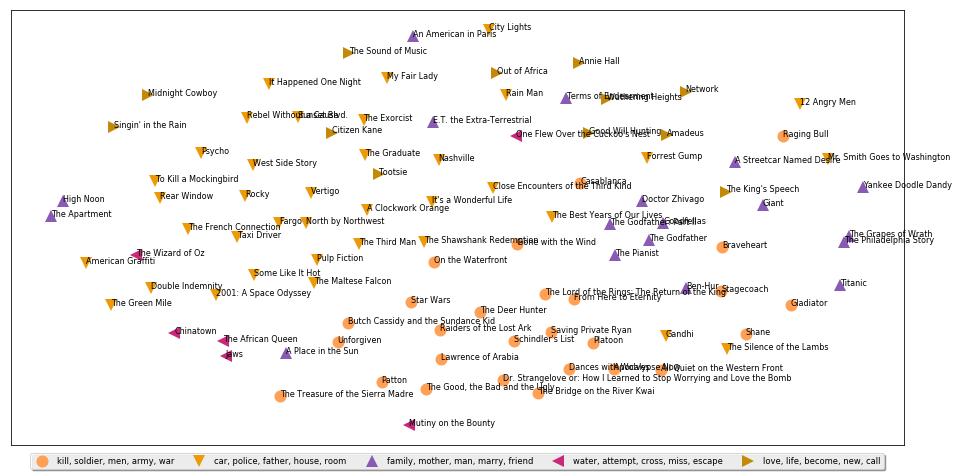

In [194]:
#visualize the clusters
plot_clusters(num_clusters=num_clusters,feature_matrix=feature_matrix,cluster_data=cluster_data,movie_data=movie_data,
              plot_size=(16,8))